In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Kütüphaneler başarıyla yüklendi!")


Kütüphaneler başarıyla yüklendi!


# 1. Numpy Bölümü

## 1.1 Numpy ile Matris İşlemleri


In [3]:
# 5x5 boyutunda rastgele matris oluşturma (0-100 arası tam sayılar)
np.random.seed(42)  # Tekrarlanabilir sonuçlar için
matrix = np.random.randint(0, 101, size=(5, 5))

print("5x5 Rastgele Matris:")
print(matrix)
print(f"\nMatris boyutu: {matrix.shape}")
print(f"Matris tipi: {matrix.dtype}")


5x5 Rastgele Matris:
[[51 92 14 71 60]
 [20 82 86 74 74]
 [87 99 23  2 21]
 [52  1 87 29 37]
 [ 1 63 59 20 32]]

Matris boyutu: (5, 5)
Matris tipi: int32


In [4]:
# Matris istatistikleri
print("=== MATRIS İSTATİSTİKLERİ ===")
print(f"Ortalama: {np.mean(matrix):.2f}")
print(f"Standart Sapma: {np.std(matrix):.2f}")
print(f"Varyans: {np.var(matrix):.2f}")
print(f"En büyük değer: {np.max(matrix)}")
print(f"En küçük değer: {np.min(matrix)}")

# Köşegen elemanları ve toplamı
diagonal = np.diag(matrix)
print(f"\nKöşegen elemanları: {diagonal}")
print(f"Köşegen elemanlarının toplamı: {np.sum(diagonal)}")

# Ek istatistikler
print(f"\n=== EK İSTATİSTİKLER ===")
print(f"Medyan: {np.median(matrix):.2f}")
print(f"Çeyrekler arası aralık (IQR): {np.percentile(matrix, 75) - np.percentile(matrix, 25):.2f}")
print(f"Toplam: {np.sum(matrix)}")
print(f"Eleman sayısı: {matrix.size}")


=== MATRIS İSTATİSTİKLERİ ===
Ortalama: 49.48
Standart Sapma: 30.90
Varyans: 954.81
En büyük değer: 99
En küçük değer: 1

Köşegen elemanları: [51 82 23 29 32]
Köşegen elemanlarının toplamı: 217

=== EK İSTATİSTİKLER ===
Medyan: 52.00
Çeyrekler arası aralık (IQR): 53.00
Toplam: 1237
Eleman sayısı: 25


## 1.2 Numpy ile Veri Simülasyonu


In [ ]:
# 1000 öğrencinin sınav puanlarını simüle etme (normal dağılım)
np.random.seed(123)  # Tekrarlanabilir sonuçlar için

# Normal dağılımdan 1000 öğrenci puanı (ortalama=65, standart sapma=15)
# 0-100 arasında sınırlandırılmış
mean_score = 65
std_score = 15
n_students = 1000

# Normal dağılımdan puanlar üret
raw_scores = np.random.normal(mean_score, std_score, n_students)

# 0-100 arasında sınırlandır
exam_scores = np.clip(raw_scores, 0, 100)

print(f"1000 öğrencinin sınav puanları simüle edildi.")
print(f"İlk 10 puan: {exam_scores[:10]}")
print(f"Son 10 puan: {exam_scores[-10:]}")


In [ ]:
# Sınav puanları istatistikleri
print("=== SINAV PUANLARI İSTATİSTİKLERİ ===")
print(f"Ortalama: {np.mean(exam_scores):.2f}")
print(f"Medyan: {np.median(exam_scores):.2f}")
print(f"Standart Sapma: {np.std(exam_scores):.2f}")
print(f"En yüksek puan: {np.max(exam_scores):.2f}")
print(f"En düşük puan: {np.min(exam_scores):.2f}")

# 50'den düşük alan öğrenci sayısı
below_50 = np.sum(exam_scores < 50)
print(f"\n50'den düşük alan öğrenci sayısı: {below_50}")
print(f"50'den düşük alan öğrenci yüzdesi: {(below_50/n_students)*100:.2f}%")

# Başarı kategorileri
excellent = np.sum(exam_scores >= 90)
good = np.sum((exam_scores >= 80) & (exam_scores < 90))
average = np.sum((exam_scores >= 70) & (exam_scores < 80))
passing = np.sum((exam_scores >= 50) & (exam_scores < 70))
failing = np.sum(exam_scores < 50)

print(f"\n=== BAŞARI KATEGORİLERİ ===")
print(f"Mükemmel (90+): {excellent} öğrenci ({(excellent/n_students)*100:.1f}%)")
print(f"İyi (80-89): {good} öğrenci ({(good/n_students)*100:.1f}%)")
print(f"Orta (70-79): {average} öğrenci ({(average/n_students)*100:.1f}%)")
print(f"Geçer (50-69): {passing} öğrenci ({(passing/n_students)*100:.1f}%)")
print(f"Kaldı (0-49): {failing} öğrenci ({(failing/n_students)*100:.1f}%)")


# 2. Pandas Bölümü

## 2.1 Veri Seti Oluşturma


In [7]:
# Öğrenci verilerini içeren DataFrame oluşturma
data = {
    'Öğrenci': ['Ali', 'Ayşe', 'Mehmet', 'Zeynep', 'Ahmet'],
    'Yaş': [20, 21, 19, 22, 20],
    'Bölüm': ['Bilgisayar', 'Fizik', 'Kimya', 'Bilgisayar', 'Fizik'],
    'Matematik': [70, 60, 80, 90, 55],
    'Fizik': [65, 75, 70, 85, 60],
    'Kimya': [80, 85, 65, 95, 70]
}

# DataFrame oluşturma
df = pd.DataFrame(data)

print("Öğrenci Veri Seti:")
print(df)
print(f"\nDataFrame boyutu: {df.shape}")
print(f"DataFrame bilgileri:")
df.info()


Öğrenci Veri Seti:
  Öğrenci  Yaş       Bölüm  Matematik  Fizik  Kimya
0     Ali   20  Bilgisayar         70     65     80
1    Ayşe   21       Fizik         60     75     85
2  Mehmet   19       Kimya         80     70     65
3  Zeynep   22  Bilgisayar         90     85     95
4   Ahmet   20       Fizik         55     60     70

DataFrame boyutu: (5, 6)
DataFrame bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Öğrenci    5 non-null      object
 1   Yaş        5 non-null      int64 
 2   Bölüm      5 non-null      object
 3   Matematik  5 non-null      int64 
 4   Fizik      5 non-null      int64 
 5   Kimya      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


## 2.2 Veri Analizi


In [8]:
# Her ders için ortalama puanı bulma
dersler = ['Matematik', 'Fizik', 'Kimya']
print("=== DERS ORTALAMALARI ===")
for ders in dersler:
    ortalama = df[ders].mean()
    print(f"{ders} ortalama: {ortalama:.2f}")

print(f"\nGenel ortalama: {df[dersler].mean().mean():.2f}")


=== DERS ORTALAMALARI ===
Matematik ortalama: 71.00
Fizik ortalama: 71.00
Kimya ortalama: 79.00

Genel ortalama: 73.67


In [9]:
# En yüksek matematik notunu alan öğrenciyi bulma
max_math_score = df['Matematik'].max()
best_math_student = df[df['Matematik'] == max_math_score]['Öğrenci'].iloc[0]

print(f"=== EN YÜKSEK MATEMATİK NOTU ===")
print(f"En yüksek matematik notu: {max_math_score}")
print(f"Bu notu alan öğrenci: {best_math_student}")

# En yüksek notları alan öğrenciler (tüm dersler için)
print(f"\n=== EN YÜKSEK NOTLAR ===")
for ders in dersler:
    max_score = df[ders].max()
    best_student = df[df[ders] == max_score]['Öğrenci'].iloc[0]
    print(f"{ders}: {max_score} - {best_student}")


=== EN YÜKSEK MATEMATİK NOTU ===
En yüksek matematik notu: 90
Bu notu alan öğrenci: Zeynep

=== EN YÜKSEK NOTLAR ===
Matematik: 90 - Zeynep
Fizik: 85 - Zeynep
Kimya: 95 - Zeynep


In [10]:
# Her öğrencinin not ortalamasını hesaplayan yeni sütun ekleme
df['Not Ortalaması'] = df[dersler].mean(axis=1)

print("=== NOT ORTALAMALARI EKLENDİ ===")
print(df[['Öğrenci', 'Not Ortalaması']].round(2))

# Ortalamaya göre sıralama
df_sorted = df.sort_values('Not Ortalaması', ascending=False)
print(f"\n=== ORTALAMAYA GÖRE SIRALAMA ===")
print(df_sorted[['Öğrenci', 'Not Ortalaması']].round(2))


=== NOT ORTALAMALARI EKLENDİ ===
  Öğrenci  Not Ortalaması
0     Ali           71.67
1    Ayşe           73.33
2  Mehmet           71.67
3  Zeynep           90.00
4   Ahmet           61.67

=== ORTALAMAYA GÖRE SIRALAMA ===
  Öğrenci  Not Ortalaması
3  Zeynep           90.00
1    Ayşe           73.33
0     Ali           71.67
2  Mehmet           71.67
4   Ahmet           61.67


In [11]:
# Bölümlere göre gruplayarak her bölümün ortalama başarılarını hesaplama
print("=== BÖLÜMLERE GÖRE ORTALAMA BAŞARILAR ===")
bolum_ortalama = df.groupby('Bölüm')[dersler + ['Not Ortalaması']].mean().round(2)
print(bolum_ortalama)

# Bölüm başına öğrenci sayısı
print(f"\n=== BÖLÜM BAŞINA ÖĞRENCİ SAYISI ===")
bolum_sayisi = df['Bölüm'].value_counts()
print(bolum_sayisi)


=== BÖLÜMLERE GÖRE ORTALAMA BAŞARILAR ===
            Matematik  Fizik  Kimya  Not Ortalaması
Bölüm                                              
Bilgisayar       80.0   75.0   87.5           80.83
Fizik            57.5   67.5   77.5           67.50
Kimya            80.0   70.0   65.0           71.67

=== BÖLÜM BAŞINA ÖĞRENCİ SAYISI ===
Bölüm
Bilgisayar    2
Fizik         2
Kimya         1
Name: count, dtype: int64


In [12]:
# Ortalaması 70'in üzerinde olan öğrencileri filtreleme
print("=== ORTALAMASI 70'İN ÜZERİNDE OLAN ÖĞRENCİLER ===")
yuksek_ortalama = df[df['Not Ortalaması'] > 70]
print(yuksek_ortalama[['Öğrenci', 'Bölüm', 'Not Ortalaması']].round(2))

# Filtreleme istatistikleri
print(f"\nToplam öğrenci sayısı: {len(df)}")
print(f"70'in üzerinde ortalama olan öğrenci sayısı: {len(yuksek_ortalama)}")
print(f"Yüzde: {(len(yuksek_ortalama)/len(df))*100:.1f}%")

# Diğer filtreleme örnekleri
print(f"\n=== DİĞER FİLTRELEME ÖRNEKLERİ ===")
print("Matematik notu 80'in üzerinde olanlar:")
math_80_plus = df[df['Matematik'] > 80]
print(math_80_plus[['Öğrenci', 'Matematik']])

print(f"\nBilgisayar bölümündeki öğrenciler:")
bilgisayar = df[df['Bölüm'] == 'Bilgisayar']
print(bilgisayar[['Öğrenci', 'Not Ortalaması']].round(2))


=== ORTALAMASI 70'İN ÜZERİNDE OLAN ÖĞRENCİLER ===
  Öğrenci       Bölüm  Not Ortalaması
0     Ali  Bilgisayar           71.67
1    Ayşe       Fizik           73.33
2  Mehmet       Kimya           71.67
3  Zeynep  Bilgisayar           90.00

Toplam öğrenci sayısı: 5
70'in üzerinde ortalama olan öğrenci sayısı: 4
Yüzde: 80.0%

=== DİĞER FİLTRELEME ÖRNEKLERİ ===
Matematik notu 80'in üzerinde olanlar:
  Öğrenci  Matematik
3  Zeynep         90

Bilgisayar bölümündeki öğrenciler:
  Öğrenci  Not Ortalaması
0     Ali           71.67
3  Zeynep           90.00


# 3. Görselleştirme

## 3.1 Histogram ile Ders Dağılımları


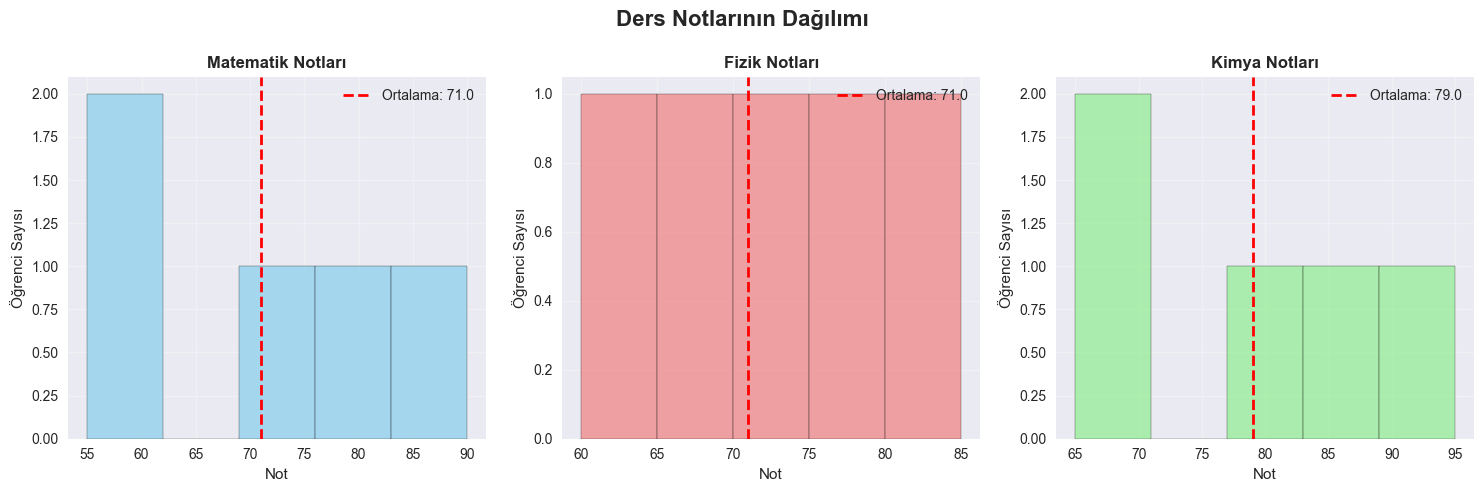

=== DERS NOTLARI İSTATİSTİK ÖZETİ ===

Matematik:
  Ortalama: 71.00
  Standart Sapma: 14.32
  Min: 55
  Max: 90

Fizik:
  Ortalama: 71.00
  Standart Sapma: 9.62
  Min: 60
  Max: 85

Kimya:
  Ortalama: 79.00
  Standart Sapma: 11.94
  Min: 65
  Max: 95


In [13]:
# Her dersin dağılımını histogram ile gösterme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Ders Notlarının Dağılımı', fontsize=16, fontweight='bold')

colors = ['skyblue', 'lightcoral', 'lightgreen']
dersler = ['Matematik', 'Fizik', 'Kimya']

for i, ders in enumerate(dersler):
    axes[i].hist(df[ders], bins=5, alpha=0.7, color=colors[i], edgecolor='black')
    axes[i].set_title(f'{ders} Notları', fontweight='bold')
    axes[i].set_xlabel('Not')
    axes[i].set_ylabel('Öğrenci Sayısı')
    axes[i].grid(True, alpha=0.3)
    
    # Ortalama çizgisi ekleme
    ortalama = df[ders].mean()
    axes[i].axvline(ortalama, color='red', linestyle='--', linewidth=2, 
                   label=f'Ortalama: {ortalama:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# İstatistiksel özet
print("=== DERS NOTLARI İSTATİSTİK ÖZETİ ===")
for ders in dersler:
    print(f"\n{ders}:")
    print(f"  Ortalama: {df[ders].mean():.2f}")
    print(f"  Standart Sapma: {df[ders].std():.2f}")
    print(f"  Min: {df[ders].min()}")
    print(f"  Max: {df[ders].max()}")


## 3.2 Bölümlere Göre Ortalamalar - Bar Grafik


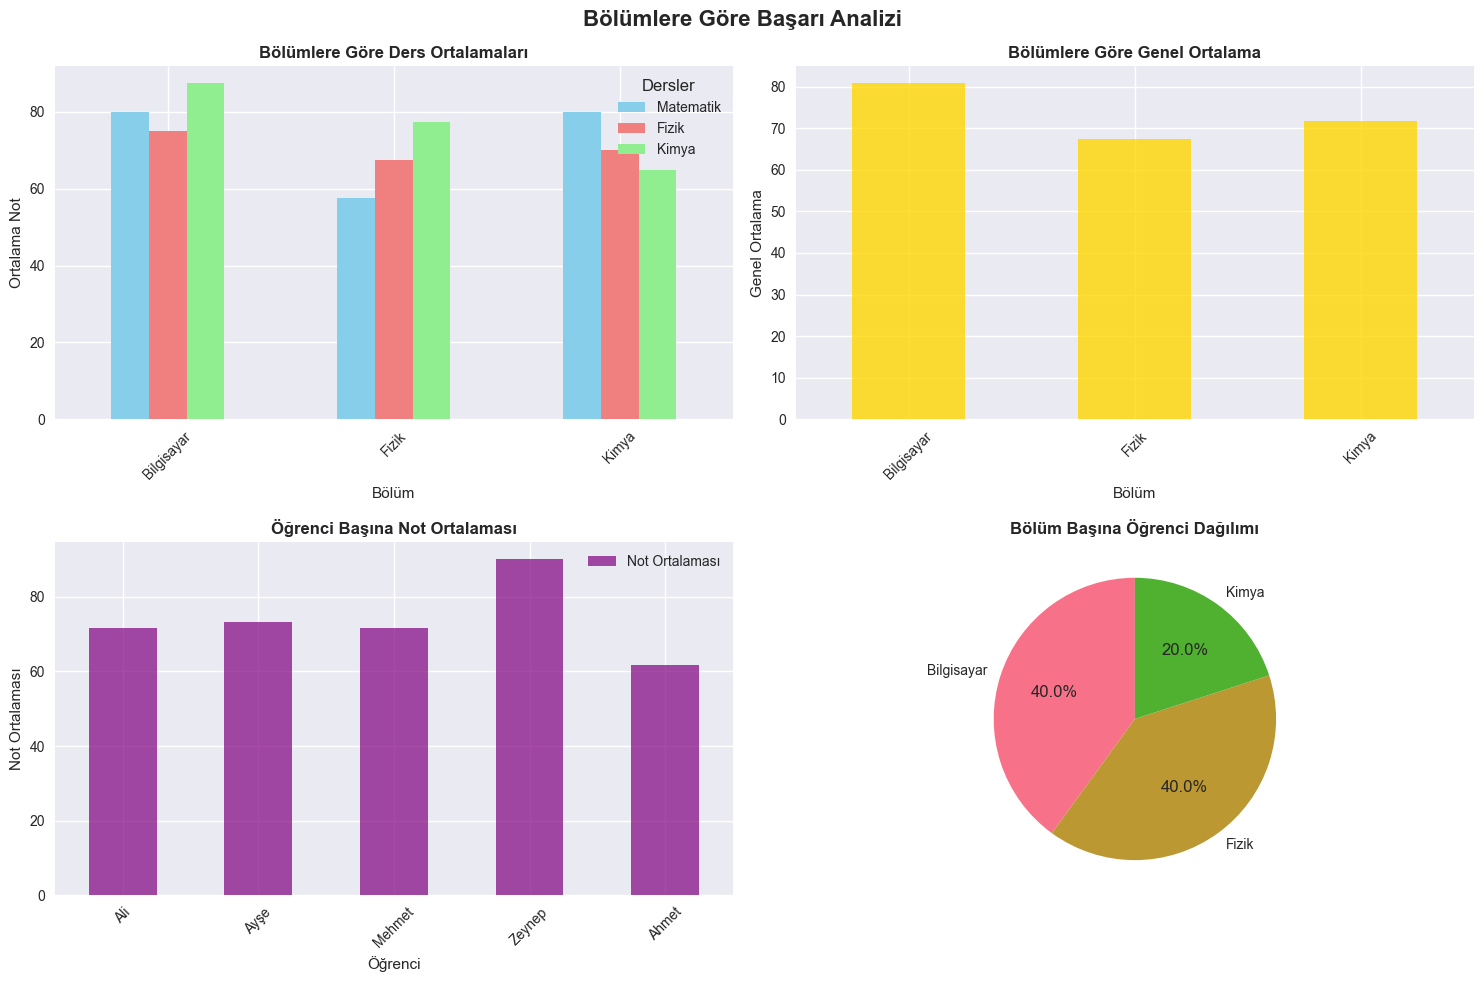

=== BÖLÜM BAŞARI ANALİZİ ===

Bilgisayar Bölümü:
  Öğrenci sayısı: 2
  Genel ortalama: 80.83
  En yüksek ortalama: 90.00
  En düşük ortalama: 71.67

Fizik Bölümü:
  Öğrenci sayısı: 2
  Genel ortalama: 67.50
  En yüksek ortalama: 73.33
  En düşük ortalama: 61.67

Kimya Bölümü:
  Öğrenci sayısı: 1
  Genel ortalama: 71.67
  En yüksek ortalama: 71.67
  En düşük ortalama: 71.67


In [15]:
# Bölümlere göre ortalamaları bar grafikte görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bölümlere Göre Başarı Analizi', fontsize=16, fontweight='bold')

# 1. Bölümlere göre ders ortalamaları
bolum_ders_ortalama = df.groupby('Bölüm')[dersler].mean()
bolum_ders_ortalama.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Bölümlere Göre Ders Ortalamaları', fontweight='bold')
axes[0,0].set_xlabel('Bölüm')
axes[0,0].set_ylabel('Ortalama Not')
axes[0,0].legend(title='Dersler')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Bölümlere göre genel ortalama
bolum_genel_ortalama = df.groupby('Bölüm')['Not Ortalaması'].mean()
bolum_genel_ortalama.plot(kind='bar', ax=axes[0,1], color='gold', alpha=0.8)
axes[0,1].set_title('Bölümlere Göre Genel Ortalama', fontweight='bold')
axes[0,1].set_xlabel('Bölüm')
axes[0,1].set_ylabel('Genel Ortalama')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Öğrenci başına not ortalaması
df.plot(x='Öğrenci', y='Not Ortalaması', kind='bar', ax=axes[1,0], color='purple', alpha=0.7)
axes[1,0].set_title('Öğrenci Başına Not Ortalaması', fontweight='bold')
axes[1,0].set_xlabel('Öğrenci')
axes[1,0].set_ylabel('Not Ortalaması')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Bölüm başına öğrenci sayısı
bolum_sayisi = df['Bölüm'].value_counts()
bolum_sayisi.plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Bölüm Başına Öğrenci Dağılımı', fontweight='bold')
axes[1,1].set_ylabel('')

plt.tight_layout()
plt.show()

# Detaylı analiz
print("=== BÖLÜM BAŞARI ANALİZİ ===")
for bolum in df['Bölüm'].unique():
    bolum_df = df[df['Bölüm'] == bolum]
    print(f"\n{bolum} Bölümü:")
    print(f"  Öğrenci sayısı: {len(bolum_df)}")
    print(f"  Genel ortalama: {bolum_df['Not Ortalaması'].mean():.2f}")
    print(f"  En yüksek ortalama: {bolum_df['Not Ortalaması'].max():.2f}")
    print(f"  En düşük ortalama: {bolum_df['Not Ortalaması'].min():.2f}")


## 3.3 Ek Görselleştirmeler


C:\Users\alicu\AppData\Local\Temp\ipykernel_21188\2296896667.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Ders', y='Not', palette='Set2')


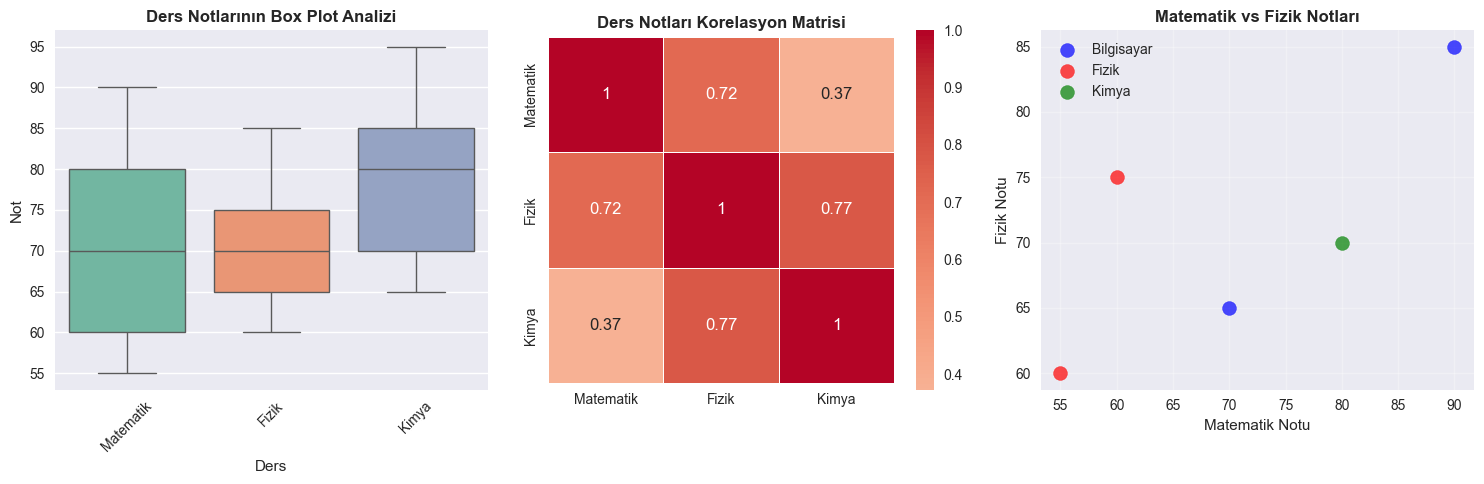

=== DERS NOTLARI KORELASYON ANALİZİ ===
           Matematik  Fizik  Kimya
Matematik      1.000  0.717  0.373
Fizik          0.717  1.000  0.773
Kimya          0.373  0.773  1.000


In [16]:
# Seaborn ile gelişmiş görselleştirmeler
plt.figure(figsize=(15, 5))

# 1. Box plot - Ders notlarının dağılımı
plt.subplot(1, 3, 1)
df_melted = df.melt(id_vars=['Öğrenci', 'Bölüm'], 
                   value_vars=dersler, 
                   var_name='Ders', 
                   value_name='Not')
sns.boxplot(data=df_melted, x='Ders', y='Not', palette='Set2')
plt.title('Ders Notlarının Box Plot Analizi', fontweight='bold')
plt.xticks(rotation=45)

# 2. Heatmap - Korelasyon matrisi
plt.subplot(1, 3, 2)
correlation_matrix = df[dersler].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Ders Notları Korelasyon Matrisi', fontweight='bold')

# 3. Scatter plot - Matematik vs Fizik
plt.subplot(1, 3, 3)
colors = {'Bilgisayar': 'blue', 'Fizik': 'red', 'Kimya': 'green'}
for bolum in df['Bölüm'].unique():
    bolum_data = df[df['Bölüm'] == bolum]
    plt.scatter(bolum_data['Matematik'], bolum_data['Fizik'], 
               label=bolum, color=colors[bolum], s=100, alpha=0.7)
plt.xlabel('Matematik Notu')
plt.ylabel('Fizik Notu')
plt.title('Matematik vs Fizik Notları', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Korelasyon analizi
print("=== DERS NOTLARI KORELASYON ANALİZİ ===")
print(correlation_matrix.round(3))
